---

# ⚖️ **SFPPy - Comply ✅**  
> **SFPPy: A Python Framework for Food Contact Compliance & Risk Assessment** 🍏⏩🍎  
---

## 📜 **A Template for Compliance Testing** ✍  

### 🔍 **Synopsis**  

This template demonstrates how to **evaluate substance migration** from a **polymeric sleeve** into a **packaged food simulant** using **SFPPy**.  

🤖 By automating key tasks—including **retrieving chemical properties**, **defining package geometries**, **applying polymer parameters**, and **running mass transfer models**—🔀 this workflow ensures **transparency**, **accuracy**, and **reproducibility** in compliance testing.  

Additionally, the notebook 💾 **captures all results and underlying assumptions**, providing a **clear and traceable record** of the simulation process for validation and regulatory assessment.  

------------------------------------------------------------------------  

## 👇 | Minimal Configurator of 🌐**SFPPyLite** ⏳
⏱️ *First execution may take 5–20 seconds*<br>
> You should see the banner **"SFPPyLite DEMO"** if everything is working correctly.<br>
> After this step, **no internet connection is needed**.


In [1]:
# 📝 Notebook configuration
nbCONF = {"📌": "🌐SFPPyLite - Comply ✅", "🎨": "svg", "⚠️": True, "🚨": False} # | 📌:title |🎨:renderer=svg/png/retina |⚠️: disclaimer=True/False | 🚨: alert=True/False

# ⛔ SFPPyLite configurator (the =3= lines with nbCong definition above should be included at the beginning of any SFPPyLite Notebook ‼️)
print("🚀 SFPPyLite🌐 initializing in your browser...","📦 Installing required packages (may take up to ⏳10 seconds)...",sep="\n"); import micropip, sys, os, time, builtins; start = time.time(); "/drive" in sys.path or sys.path.append("/drive"); await micropip.install(["numpy", "scipy", "matplotlib", "pandas", "ipywidgets", "nbformat", "openpyxl"])
print("🧱 Assembling notebook elements..."); from IPython.display import display, HTML; from utils.nbutils import set_figure_format, create_header_footer, create_logo, create_subtitle, create_synopsis, create_disclaimer, create_alert; set_figure_format(nbCONF.get("🎨")); logo, subtitle, synopsis, disclaimer, alert, = create_logo(), create_subtitle(), create_synopsis(), create_disclaimer(), create_alert(fontsize=14)
(header,footer,separator) = create_header_footer(title=nbCONF.get("📌"),what="all"); separator2 = HTML('<hr style="border: none; height: 4px; width: 60%; margin: 2em auto; background-color: #4CAF50; border-radius: 2px;">'); print(f"✅ SFPPyLite🌐 initialized in {time.time()-start:.2f} seconds."); what = [header] + ([subtitle, disclaimer] if nbCONF.get("⚠️") else []) + ([alert] if nbCONF.get("🚨") else []) + [separator]; display(*what)

# 👤 User Overrides to overcome memory limitations and set units for plotting
from patankar.useroverride import useroverride # type useroverride <enter> to see implemented overrides
useroverride.update(
    ntimes = 100,     # instead of 1000 (number of simulation times kept)
    nmesh = 300,       # instead of 600 (Finite-Volume resolution, number of FV nodes)
    tunit = "days",    # time units (can be any value s,min,days,weeks,months,years)
    lunit = "µm",      # length units (can be any value, nm, µm or um, mm,cm or even in)
    Cunit = "mg/kg",  # set concentration units instead of a.u.
    )

🚀 SFPPyLite🌐 initializing in your browser...
📦 Installing required packages (may take up to ⏳10 seconds)...
🧱 Assembling notebook elements...


Matplotlib is building the font cache; this may take a moment.


📊 Matplotlib inline figure format set to: svg
✅ SFPPyLite🌐 initialized in 8.36 seconds.




***

## 1 | **Problem Description** 🎯

### 1.1 | Mass Transfer from a PVC Sleeve to an HDPE Bottle Containing a Dairy Product for Infants

In this scenario, we aim to assess the **migration risk** associated with a **polyvinyl chloride (PVC) sleeve** used to wrap a **200 mL high-density polyethylene (HDPE) bottle** containing a **dairy product for infants**. The sleeve has a **thickness of 150 µm**, while the HDPE bottle wall is **2 mm thick**. The focus is on the **mass transfer of four specific substances** that may originate from the PVC sleeve and migrate into the dairy product.

#### **Target Migrants:**

| **Substance** | **Function** | **Potential Concerns** |
|--------------|-------------|------------------------|
| **Di(2-ethylhexyl) phthalate (DEHP)** | Plasticizer in PVC | Endocrine disruptor |
| **Dibutyl phthalate (DBP)** | Plasticizer in flexible PVC | Potential reproductive toxicity |
| **Benzophenone (BP)** | UV absorber in inks/coatings | May be present in sleeve printing |
| **Ethyl acetate (EA)** | Volatile solvent in inks/adhesives | Used in ink formulations or adhesives |


<details>
    <summary>Click to expand details</summary>
    
1. **Di(2-ethylhexyl) phthalate (DEHP)** – A commonly used plasticizer in PVC, with known endocrine-disrupting properties.
2. **Dibutyl phthalate (DBP)** – Another plasticizer, frequently present in flexible PVC, with potential reproductive toxicity.
3. **Benzophenone (BP)** – A UV absorber that may be present in the inks or coatings used for printing on the sleeve.
4. **Ethyl acetate (EA)** – A volatile solvent often used in ink formulations or adhesives.
</details>

***

#### **Mass Transfer Pathway**
The migration of these substances can occur through multiple steps:
1. **Diffusion within the PVC sleeve** – Migrants initially present in the bulk phase of the sleeve diffuse toward the inner surface.
2. **Transfer from the PVC sleeve to the HDPE bottle** – This can occur via:
   - **Direct contact diffusion** between the sleeve and the bottle.
   - **Gas-phase transfer** (for volatile compounds like ethyl acetate).
3. **Diffusion through the HDPE bottle wall** – The rate of migration depends on the polymer’s permeability and its interaction with each migrant.
4. **Migration into the dairy product** – Once permeated through the bottle wall, the migrant partitions into the dairy product. Fat content and storage conditions play a crucial role in absorption.

#### **Key Factors Influencing Migration**
- **Temperature** – Storage and processing conditions (e.g., refrigeration vs. room temperature) affect migration rates.
- **Fat content of the dairy product** – Lipophilic substances (e.g., DEHP, DBP, benzophenone) have a higher affinity for fatty matrices.
- **Polymer properties** – The **diffusion coefficient ($D$)** and **partition coefficient ($K$)** between PVC, HDPE, and the dairy product determine the extent of migration.
- **Industrual Practices** – Storing the bottles with their sleeves before filling them can affect the initial distribution of substances and strongly affect the validity of the approach using mathematical calculations.

<details>
    <summary>Click to expand diagram</summary>

```mermaid
---
title: Diagram summarizing the diffusion pathways in the mass transfer process from the PVC sleeve to the dairy product through different mechanisms
---

flowchart TD
    A[PVC Sleeve] -->|Bulk Diffusion| B[Inner Surface of PVC];
    B -->|Contact Diffusion| C[HDPE Bottle];
    B -->|"Gas-Phase Transfer (Volatiles)"| D[HDPE Surface];
    
C -->|Diffusion Through Bottle Wall| E[Inner Surface of HDPE];
D -->|Gas-Phase Diffusion| E;
E -->|Migration into Dairy Product| F[Dairy Product];
subgraph "Key Factors Influencing Migration"
    T[Temperature Effect] -->|Increases Diffusion Rate| F;
    F1[Fat Content] -->|Enhances Lipophilic Absorption| F;
    P[Polymer Properties] -->|Controls Permeability| E;
    S[Storage Practices] -->|Affects Initial Distribution| A;
end
```

</details>

***


### 1.2 | **Followed Approach**


- **Initial (Naive) Scenario:** 😇 We begin by assuming that the substances of concern reside only in the sleeve from the outset, which superficially suggests minimal issues. However, this simplified  model can overlook significant effects such as pre-contact diffusion and other real-world factors.

- **More Realistic Description:** 🤔 We then leverage SFPPy’s enhanced capabilities to capture more accurate dynamics, such as prior storage with no food (which can shift the distribution of migrants). 
  All physico-chemical properties and regulatory data are either retrieved from internal databases or calculated automatically, removing the need for manual input of these parameters.

- **Detailed Sensitivity Analysis:** 🧐 Using `SFPPy`’s flexibility, users are encouraged to systematically alter  factors like temperature, contact time, polymer thickness, or 
  pre-storage conditions. The results highlight which parameters  dominate migration outcomes and, thus, where future experimental  efforts or refinements may be most valuable.

> [!IMPORTANT]
>
> By comparing the naive scenario against the more realistic, extended scenario, this section demonstrates how comprehensive modeling (with minimal human intervention for data retrieval) yields a more robust assessment of potential health and safety risks.

***

## 2 | ⏳ **Listing migrants `M[i]`** 📝

The class `migrant` or its derived one `migrantToxtree` is a Swiss knife for any safety assessment. It will connect to databases to retrieve information and expose it to other tools of `SFPPy`.

> 📌 We list create a list of objects `migrants` from a list of their names.

In [2]:
# import the substance databases (millions of substances are available via PubChem)
start = time.time(); print("⏳ Compile SFPPy🍏⏩🍎 libraries and load chemical databases ⌬...")
from patankar.loadpubchem import migrant
print(f"✅ Import/compilation completed in {time.time() - start:.2f} seconds.")

# Show these migrants
migrants = ["di(2-ethylhexyl) phthalate",
            "dibutyl phthalate",
            "benzophenone",
            "ethyl acetate",
            # add a new migrant here,
           ]
M = [migrant(i) for i in migrants] # store all migrant information into a list
print(M) # print the list  (when the substance is positively listed, you will see EC 10/2011)
display(separator)

⏳ Compile SFPPy🍏⏩🍎 libraries and load chemical databases ⌬...
✅ Import/compilation completed in 0.00 seconds.
<migrant object>
         Compound: di(2-ethylhexyl) phthalate
             Name: Bis(2-ethylhexyl) phthalate
              cid: 8343
              CAS: 117-81-7
          M (min): 390.6
          M_array: [390.6]
          formula: C24H38O4
           smiles: CCCCC(CC)COC(=O)C1=C [...] C=C1C(=O)OCC(CC)CCCC
         InChiKey: BJQHLKABXJIVAM-UHFFFAOYSA-N
             logP: [7.4]
        P' (calc): [0.]
   --- EC 10/2011: ---------------
              SML: 60 [mg/kg]
     part a group: of 22 substances
       EC|FCM|REF: 204-211-0|728|75100
<migrant object>
         Compound: dibutyl phthalate
             Name: phthalic acid, dibutyl ester
              cid: 3026
              CAS: 84-74-2
          M (min): 278.34
          M_array: [278.34]
          formula: C16H22O4
           smiles: CCCCOC(=O)C1=CC=CC=C1C(=O)OCCCC
         InChiKey: DOIRQSBPFJWKBE-UHFFFAOYSA-N
            

💡 **The entries associated with each substance** `m = M[i]` **(with** `i = 0,1,2,3`) **can be explored using** `m.property`.  

For example, **to review the Annex 1 record for dibutyl phthalate** under **EU Regulation No 10/2011**, use:  

```python
M[1].annex1
```  

This allows direct access to **regulatory information, properties, and compliance data** for each substance. 🔍📖

***

## 2 | **Defining the packaging `B`: 200 mL bottle** 🫙

Below is an example of retrieving the base 3D shapes from SFPPy:

```python
from patankar.geometry import help_geometry
help_geometry()
```

<details>
    <summary>Click to Expand Table</summary>

```
=== List of Implemented Geometries & Synonyms ===

Shape Class: Cone
  Synonyms       : cone
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for Cone:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A full cone with closed circular base.
    Volume = (1/3) π r² h. Surface area = base + lateral area.
------------------------------------------------------------
Shape Class: Cylinder
  Synonyms       : can, cylinder
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for Cylinder:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A standard cylinder with top and bottom faces.
    Volume = π r² h. Surface area includes top and bottom disks.
------------------------------------------------------------
Shape Class: Hemisphere
  Synonyms       : bowl, halfsphere, hemisphere
  Required Params: radius
  Expected Keywords:
    Expected keywords for Hemisphere:
      - radius: ['radius', 'r']
  Documentation:
    A hemisphere (half a sphere) typically open at the flat side.
    Volume = (2/3) π r³. Surface area = 3π r² (2πr² curved + πr² open).
------------------------------------------------------------
Shape Class: OpenCone
  Synonyms       : open_cone
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for OpenCone:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A cone with its base removed, leaving a single open circular face.
    Volume = (1/3) π r² h. Surface area = π r * slant (no base).
------------------------------------------------------------
Shape Class: OpenCylinder1
  Synonyms       : glass, jar, open_cylinder_1, pot
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for OpenCylinder1:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A cylinder with exactly one open end (like a glass).
    Volume = π r² h. Surface area = 2πrh + πr².
------------------------------------------------------------
Shape Class: OpenCylinder2
  Synonyms       : open_cylinder_2, straw, tube
  Required Params: radius, height
  Expected Keywords:
    Expected keywords for OpenCylinder2:
      - radius: ['radius', 'r']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A cylinder with two open ends (like a straw).
    Volume = π r² h. Surface area = 2πrh (no top or bottom).
------------------------------------------------------------
Shape Class: OpenPrism1
  Synonyms       : box_container, open_box, open_prism1, openbox
  Required Params: length, width, height
  Expected Keywords:
    Expected keywords for OpenPrism1:
      - length: ['length', 'l']
      - width: ['width', 'w', 'depth', 'd']
      - height: ['height', 'h']
  Documentation:
    A rectangular prism with ONE open face (e.g. open top).
    Volume = l * w * h.
    Surface area = 2(lw + lh + wh) - lw (remove top).
------------------------------------------------------------
Shape Class: OpenPrism2
  Synonyms       : open_box2, open_prism2, openbox2
  Required Params: length, width, height
  Expected Keywords:
    Expected keywords for OpenPrism2:
      - length: ['length', 'l']
      - width: ['width', 'w', 'depth', 'd']
      - height: ['height', 'h']
  Documentation:
    A rectangular prism with TWO open faces (no top, no bottom).
    Volume = l * w * h.
    Surface area = 2(lw + lh + wh) - 2(lw).
------------------------------------------------------------
Shape Class: OpenSquare1
  Synonyms       : open_square1
  Required Params: side, height
  Expected Keywords:
    Expected keywords for OpenSquare1:
      - side: ['side', 'width', 'depth', 'w', 'd']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A square-based box with ONE open face (like an open-top box).
    Volume = side² * height.
    Surface area = bottom + 4 walls = side² + 4 side * height.
------------------------------------------------------------
Shape Class: OpenSquare2
  Synonyms       : open_square2
  Required Params: side, height
  Expected Keywords:
    Expected keywords for OpenSquare2:
      - side: ['side', 'width', 'depth', 'w', 'd']
      - height: ['height', 'length', 'h', 'l']
  Documentation:
    A square-based box with TWO open faces (no top, no bottom).
    Volume = side² * height.
    Surface area = 4 side * height.
------------------------------------------------------------
Shape Class: RectangularPrism
  Synonyms       : box, cube, cuboid, prism, rectangular_prism
  Required Params: length, width, height
  Expected Keywords:
    Expected keywords for RectangularPrism:
      - length: ['length', 'l']
      - width: ['width', 'w', 'depth', 'd']
      - height: ['height', 'h']
  Documentation:
    A rectangular prism with all faces closed.
    Volume = l * w * h. Surface area = 2(lw + lh + wh).
------------------------------------------------------------
Shape Class: Sphere
  Synonyms       : ball, sphere
  Required Params: radius
  Expected Keywords:
    Expected keywords for Sphere:
      - radius: ['radius', 'r']
  Documentation:
    A full sphere.
    Volume = (4/3) π r³. Surface area = 4π r².
------------------------------------------------------------
Shape Class: SquarePyramid
  Synonyms       : pyramid, square_pyramid
  Required Params: side, height
  Expected Keywords:
    Expected keywords for SquarePyramid:
      - side: ['side', 'length', 'width', 'a', 's']
      - height: ['height', 'h']
  Documentation:
    A square-based pyramid.
    Volume = (side² * height) / 3. Surface area = base + 4 triangles.
------------------------------------------------------------
```
</details>

<br>

> We select “**bottle**” geometry with specified parameters:


In [3]:
# Import the packaging databases (shapes)
from patankar.geometry import Packaging3D
B =  Packaging3D("bottle",
        body_radius=(20, "mm"),
        body_height=(15.5, "cm"),
        neck_radius=(1.2, "cm"),
        neck_height=(2,"cm")
    )
B.get_volume_and_area() # in m³ and m²
display(separator)

## 3 | *Defining the Multilayer Materials `P`=`HDPE`+`PVC`* 🧱

The list of available materials and polymers can be retrieved with this code:

```python
from patankar.layer import list_materials
list_materials()
```
<details>
    <summary>Click to Expand Table</summary>
    
| Material Key            | Description                                  | Type     | Synonyms                                         |
| ----------------------- | -------------------------------------------- | -------- | ------------------------------------------------ |
| HDPE                    | High-Density Polyethylene                    | polymer  | PEHD, high-density polyethylene                  |
| HIPS                    | High-Impact Polystyrene                      | polymer  | high-impact polystyrene                          |
| LDPE                    | Low-Density Polyethylene                     | polymer  | PEBD, PE, low-desnity polyethylne                |
| LLDPE                   | Linear Low-Density Polyethylene              | polymer  | PEBLD, PELBD, linear low-Density polyethylene    |
| PA6                     | Polyamide 6                                  | polymer  | PA 6, Polyamide 6                                |
| PA66                    | Polyamide 6,6                                | polymer  | PA 6,6, polyamide 6,6                            |
| PBT                     | Polybutylene Terephthalate                   | polymer  | None                                             |
| PEN                     | Polyethylene Naphthalate                     | polymer  | polyethylene naphthalate                         |
| PMMA                    | Polymethyl Methacrylate                      | polymer  | polymethyl methacrylate                          |
| PP                      | Polypropylene                                | polymer  | polypropylene                                    |
| PPrubber                | Atactic Polypropylene (Rubbery)              | polymer  | aPP, atactic PP, atactic polypropylene           |
| PS                      | Polystyrene                                  | polymer  | GPPS, polystyrene, general purpose polystyrene   |
| PVAc                    | Polyvinyl Acetate                            | polymer  | PVAC                                             |
| SBS                     | Styrene-Butadiene-Styrene                    | polymer  | styrene-butadiene-styrene                        |
| gPET                    | Glassy Polyethylene Terephthalate            | polymer  | PET, PETE, polyethylene terephthalate            |
| oPP                     | Oriented Polypropylene                       | polymer  | oriented polypropylene                           |
| plasticizedPVC          | Plasticized Polyvinyl Chloride               | polymer  | plasticized polyvinyl chloride, PVC cling film   |
| rHIPS                   | Rubbery High-Impact Polystyrene              | polymer  | rubbery HIPS                                     |
| rPET                    | Rubbery Polyethylene Terephthalate           | polymer  | PET above Tg, PETE above Tg, PET T>Tg, PETE T>Tg |
| rPS                     | Rubbery Polystyrene                          | polymer  | None                                             |
| rigidPVC                | Rigid Polyvinyl Chloride                     | polymer  | rigid PVC, PVC, rigid polyvinyl chloride         |
| wPET                    | Wet (Plasticized) Polyethylene Terephthalate | polymer  | plasticized PET, plasticized PETE, wet PET       |
| AdhesiveAcrylate        | Acrylate Adhesive                            | adhesive | PMMA adhesive                                    |
| AdhesiveEVA             | EVA Adhesive                                 | adhesive | EVA adhesive                                     |
| AdhesiveNaturalRubber   | Natural Rubber Adhesive                      | adhesive | natural rubber adhesive                          |
| AdhesivePU              | Polyurethane Adhesive                        | adhesive | PU adhesive, polyurethane adhesive               |
| AdhesivePVAC            | PVAc Adhesive                                | adhesive | adhesive PVAc, adhesive PVAC                     |
| AdhesiveSyntheticRubber | Synthetic Rubber Adhesive                    | adhesive | synthetic rubber adhesive                        |
| AdhesiveVAE             | VAE Adhesive                                 | adhesive | VAE adhesive                                     |
| Cardboard               | Cardboard                                    | other    | board                                            |
| Paper                   | Paper                                        | other    | paper                                            |
| air                     | Air                                          | other    | gaz                                              |


</details>

<br>

> 📌 We define a **two-layer system**: **1 mm of HDPE** (bottle wall) plus a **150 µm PVC sleeve**. We initially assume 1000 mg/kg in the PVC layer and 0 mg/kg in the HDPE.

<br>


💡 Quantities can be indicated within brackets `()` to include units. All SI, imperial, and some customized units are recognized. `"µm"` or `"um"` are equivalent.


⚠️ In `SFPPy`, the layer directly contacting the food is treated as the “**leftmost**” layer and is internally labeled as layer #1, while layer #0 represents the Food/Simulant boundary. Since standard Python lists start at index 0, when you see `P[0]` in code, it corresponds to the `layer 1 of 2` shown in the summary.

In [4]:
# Import materials
from patankar.layer import list_materials, material
C0guess = 1000 # maximum concentration (guess, it value will be reversed later)
HDPE = material('HDPE')(l=(1,'mm'),C0=0) # we assume 0 concentration in the bottle
PVC = material('PVC cling film')(l=(150,'um'),C0=C0guess) # empirical concentral of 1000 ppm in the material
P = HDPE+PVC # the most left material is contact
print(repr(P)) # with default parameters
display(separator)


[LAYER object version=1, contact=olivier.vitrac@agroparistech.fr]
2-multilayer of LAYER object:
-- [ layer 1 of 2 ] ---------- barrier rank=2 --------------
      name: "layer in HDPE"
      type: "polymer"
  material: "high-density polyethylene"
      code: "HDPE"
         l: 0.001 [meter]
         D: 1e-13 [m**2/s]
         k: 1 [a.u.]
        C0: 0 [a.u.]
-- [ layer 2 of 2 ] ---------- barrier rank=1 --------------
      name: "layer in plasticized PVC"
      type: "polymer"
  material: "plasticized PVC"
      code: "pPVC"
         l: 0.00015 [meter]
         D: 1e-14 [m**2/s]
         k: 1 [a.u.]
        C0: 1000 [a.u.]
<multilayer with 2 layers: ['layer in HDPE', 'layer in plasticized PVC']>


⚠️ **The values of** $D$ **(diffusivity) and** $k$ **(partition coefficient) displayed above have not been explicitly assigned** and currently **correspond to their default values for this polymer**. Their **actual values will be set** once the **substance is injected into the structure** using the **`%` operator**.
***

## 4 |  **Defining the Food Simulant `F`** 🧪🌡️⏱️

The full list of food contact conditions and simulants can be retrieved with this code:
    
```python
from patankar.food import help_food
help_food()
```

<details>
    <summary>Click to expand the table</summary>
    
    
| Class Name       | Name                 | Description          | Level    | Inheritance          | Init Params          |
|------------------|----------------------|----------------------|----------|----------------------|----------------------|
| foodphysics      | food physics         | Root physics class   | base     | object               |                      |
|                  |                      | used to implement    |          |                      |                      |
|                  |                      | food and mass        |          |                      |                      |
|                  |                      | transfer physics     |          |                      |                      |
| aqueous          | aqueous contact      | minimize mass        | root     | chemicalaffinity     | k                    |
|                  |                      | transfer             |          |                      |                      |
| chemicalaffinity | undefined            | default chemical     | root     | foodphysics          | k                    |
|                  |                      | affinity             |          |                      |                      |
| fat              | fat contact          | maximize mass        | root     | chemicalaffinity     | k                    |
|                  |                      | transfer             |          |                      |                      |
| foodlayer        | generic food layer   | root food class      | root     | foodphysics          | volume, surfacearea, |
|                  |                      |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| intermediate     | intermediate         | intermediate         | root     | chemicalaffinity     | k                    |
|                  |                      | chemical affinity    |          |                      |                      |
| liquid           | liquid food          | liquid food products | root     | texture              | h                    |
| nofood           | undefined            | impervious boundary  | root     | foodphysics          | h                    |
|                  |                      | condition            |          |                      |                      |
| perfectlymixed   | perfectly mixed      | maximize mixing,     | root     | texture              | h                    |
|                  | liquid               | minimize the mass    |          |                      |                      |
|                  |                      | transfer boundary    |          |                      |                      |
|                  |                      | layer                |          |                      |                      |
| realcontact      | contact conditions   | real storage         | root     | foodphysics          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| semisolid        | solid food           | solid food products  | root     | texture              | h                    |
| setoff           | setoff               | periodic boundary    | root     | foodphysics          | h                    |
|                  |                      | conditions           |          |                      |                      |
| testcontact      | migration testing    | migration testing    | root     | foodphysics          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| texture          | undefined            | default class        | root     | foodphysics          | h                    |
|                  |                      | texture              |          |                      |                      |
| foodproperty     | generic food layer   | root food class      | property | foodlayer            | volume, surfacearea, |
|                  |                      |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| realfood         | generic food layer   | real food class      | property | foodproperty         | volume, surfacearea, |
|                  |                      |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| simulant         | generic food         | food simulant        | property | foodproperty         | volume, surfacearea, |
|                  | simulant             |                      |          |                      | density, CF0,        |
|                  |                      |                      |          |                      | contacttime          |
| solid            | solid food           | solid food products  | property | foodproperty         | volume, surfacearea, |
|                  |                      |                      |          |                      | density, h, CF0,     |
|                  |                      |                      |          |                      | contacttime          |
| ambient          | ambient              | ambient storage      | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| boiling          | boiling              | boiling conditions   | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| chilled          | ambient              | ambient storage      | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| frozen           | frrozen              | freezing storage     | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| frying           | frying               | frying conditions    | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| hotambient       | hot ambient          | hot ambient storage  | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| hotfilled        | hotfilled            | hot-filling          | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| hotoven          | hot oven             | hot oven conditions  | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| microwave        | microwave            | microwave-oven       | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| oven             | oven                 | oven conditions      | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| panfrying        | panfrying            | panfrying conditions | contact  | realcontact          | contacttemperature,  |
|                  |                      |                      |          |                      | contacttime          |
| pasteurization   | pasteurization       | pasteurization       | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| sterilization    | sterilization        | sterilization        | contact  | realcontact          | contacttemperature,  |
|                  |                      | conditions           |          |                      | contacttime          |
| transportation   | hot transportation   | hot transportation   | contact  | realcontact          | contacttemperature,  |
|                  |                      | storage conditions   |          |                      | contacttime          |
| acetonitrile     | acetonitrile         | acetonitrile         | user     | simulant,            | volume, surfacearea, |
|                  |                      |                      |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      |                      |          | aqueous              | CF0, contacttime     |
| ethanol          | ethanol              | ethanol = from pure  | user     | simulant,            | volume, surfacearea, |
|                  |                      | ethanol down to      |          | perfectlymixed, fat  | density, h, k, k0,   |
|                  |                      | ethanol 95%          |          |                      | CF0, contacttime     |
| ethanol50        | ethanol 50           | ethanol 50, food     | user     | simulant,            | volume, surfacearea, |
|                  |                      | simulant of dairy    |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      | products             |          | intermediate         | CF0, contacttime     |
| ethanol95        | ethanol              | ethanol = from pure  | user     | ethanol              | volume, surfacearea, |
|                  |                      | ethanol down to      |          |                      | density, h, k, k0,   |
|                  |                      | ethanol 95%          |          |                      | CF0, contacttime     |
| isooctane        | isooctane            | isooctane food       | user     | simulant,            | volume, surfacearea, |
|                  |                      | simulant             |          | perfectlymixed, fat  | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| methanol         | methanol             | methanol             | user     | simulant,            | volume, surfacearea, |
|                  |                      |                      |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      |                      |          | aqueous              | CF0, contacttime     |
| oil              | olive oil            | olive oil food       | user     | oliveoil             | volume, surfacearea, |
|                  |                      | simulant             |          |                      | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| oliveoil         | olive oil            | olive oil food       | user     | simulant,            | volume, surfacearea, |
|                  |                      | simulant             |          | perfectlymixed, fat  | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| rolled           | rolled               | storage in rolls     | user     | setoff               | h                    |
| stacked          | stacked              | storage in stacks    | user     | setoff               | h                    |
| tenax            | Tenax                | simulant of dry food | user     | simulant, solid, fat | volume, surfacearea, |
|                  |                      | products             |          |                      | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |
| water            | water                | water food simulant  | user     | simulant,            | volume, surfacearea, |
|                  |                      |                      |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      |                      |          | aqueous              | CF0, contacttime     |
| water3aceticacid | water 3% acetic acid | water 3% acetic acid | user     | simulant,            | volume, surfacearea, |
|                  |                      | - simulant for       |          | perfectlymixed,      | density, h, k, k0,   |
|                  |                      | acidic aqueous foods |          | aqueous              | CF0, contacttime     |
| yogurt           | solid food           | yogurt               | user     | realfood, semisolid, | volume, surfacearea, |
|                  |                      |                      |          | ethanol50            | density, h, k, k0,   |
|                  |                      |                      |          |                      | CF0, contacttime     |


</details>

<br>

> 📌 For this scenario, we use **ethanol** as a worst-case simulant, stored for 28 days at 7°C. In the sensitivity analysis, ethanol will be replaced by ethanol 50% as recommended for dairy products even though it has been debated (including by us).

| 🗓️ contact time = sale-by-date | 🌡️contact temperature=above the recommended 4°C |
| ----------------------------- | ---------------------------------------------- |
| contacttime=(`28` ,`"days"`)  | contacttemperature=(`7` ,`"degC"`)             |

In [5]:
# import food simulants
from patankar.food import ethanol, ethanol50
F = ethanol(contacttime=(28,"days"),contacttemperature=(7,"degC"))
print(repr(F)) # with default volume and surface area
display(separator)

Food object "ethanol" (ethanol = from pure ethanol down to ethanol 95%) with properties:
               CF0: 0 [a.u.]
contacttemperature: 7 [degC]
       contacttime: 2419200 [s]
           density: 1000 [kilogram / meter ** 3]
                 h: 0.0001 [meter / second]
       surfacearea: 0.06 [meter ** 2]
            volume: 0.001 [meter ** 3]
<ethanol: ethanol>


## 5 | **Simulations** 🚀

The simulations are managed via `4` pipelines. Ech pipeline receives a different substance `m` from the list `M`. According to the intended use, the results can be stored, extracted and plotted.


<details>
    <summary>Click to see details how SFPPy code piplelines</summary>
    
> `SFPPy` integrates pipelines to evaluate complex operations. Three operators are used `%` (substance ⌬ injection), `<<` (inherit) and `>>` (propagate, run). The pipeline prototype is:

| <kbd>m</kbd>`%` |        <kbd>F</kbd>         |  `<<` <kbd>G</kbd>  `>>`   |       <kbd>P</kbd>  `>>`    |    <kbd>S</kbd>  `>>`   <kbd>S</kbd>  |
| :----------: | :-------------------------: | :---------------: | :---------------------: | :-----------------: |
| *substance*  | *food or contact condition* | *geometry/shape* | *material (multilayer)* | *simulation result* |
| ⌬  | 🥗🥪🍟🥘🍳🔥☀️❄️⏱️ | 🥫🌯🧃🫙🍼🍱 | ♳♴♵♶♷♸♹♼♽ | 📈📊📉 |



</details>

<br>

> 📌 We simulate migration for each of the four substances. Concentrations in the food simulant $C_F$ at the end of the contact time are stored in the list `CF`:


In [6]:
# Simulate all mass transfer and collect 
CF = [(m % F << B >> P >> F).CFtarget.item() for m in M]
ttarget = F.contacttime / (3600*24) # all values are stored in SI
Ttarget = F.contacttemperature
print(f'CF after {ttarget} days @{Ttarget}°C =',CF)
display(separator)

CF after [28.] days @[7]°C = [2.407454503231929e-37, 6.821948194302743e-16, 3.733064423577185e-06, 0.13331126661526804]


## **6 | Interpretation of** $C_{P,0}^{max}$ **(in the sleeve)** 🤔  

> 📌 Given that we assumed `C0guess` = **1000 mg/kg** in the **PVC layer**, we can now **invert the results** to determine the **maximum initial concentration** in the sleeve, denoted as $C_{P,0}^{max}$, that would **exactly match** the specific migration limit (**SML**) for each substance.

***

### 6.1 | **Retrieval of SML values**

The Specific Migration Limit (`SML`) is a regulatory threshold that defines the maximum allowable amount of a specific chemical substance that can migrate from a food contact material (FCM) into food or food simulants.

<details>
    <summary>Click to see details on SML</summary>

SML values are typically set by regulatory bodies, such as:
    
- European Union (EU) → Regulation (EU) No 10/2011 on plastic materials in contact with food.
- United States (FDA) → 21 CFR Part 177 for specific food contact substances.
- China, Japan, and other jurisdictions also have their own migration limits

`SFPPy` relies on the Annex 1 of Regulation (EU) No 10/2011 published on [ECHA website](https://echa.europa.eu/plastic-material-food-contact). The update is manual and it frequently performed in the different releases of `SFPPy`.

</details>


In [7]:
# Collect SML
SML = [m.SML for m in M]
print("SML=",SML,"mg/kg")
display(separator2)

SML= [60, 0.6, 0.6, 60] mg/kg


### 6.2 | **Derivation of** $C_{P,0}^{max}$  
$C_{P,0}^{max}$ represents the **exact concentration in the sleeve** that will result in a final food simulant concentration equal to the **Specific Migration Limit (SML)**, i.e.,: $C_F = SML$.


<details>
<summary>Click to see the demonstration</summary>  
<br>  

The concentration in the food simulant, $C_F(t)$, is a function of the **initial concentration profile** inside the material, denoted as $C_x(x,t=0)$:

$$
C_F(t) = f\left(t, C_x(x,t=0) \right)
$$

Using a **dimensionless concentration formulation**, the initial profile can be rewritten as:

$$
C_x(x,t=0) = C_0 \times C_x^{\text{dimensionless}}(x,t=0)
$$

Since the system follows **Henry-like sorption isotherms** and **Fick's laws**, the function $f$ remains **linear** with respect to the initial concentration:

$$
C_F(t) = f\left(t, C_0 \times C_x^{\text{dimensionless}}(x,t=0)\right) = C_0 \times f\left(t, C_x^{\text{dimensionless}}(x,t=0)\right)
$$

Because this equation holds **for any** $C_0$, we can introduce $C_{P,0}^{max}$ as a **scaling factor**, ensuring that the migration reaches the SML at equilibrium:

$$
SML = C_{P,0}^{max} \times f\left(t, C_x^{\text{dimensionless}}(x,t=0)\right)
$$

Rearranging this equation, we obtain the **normalized relationship**:

$$
\frac{SML}{C_{P,0}^{max}} = \frac{C_F^{\text{with } C_0^{\text{guess}}}(t=t_{\text{target}})}{C_0^{\text{guess}}}
$$

Thus, the final equation for determining $C_{P,0}^{max}$ reads:

$$
C_{P,0}^{max} = \frac{SML}{C_F^{\text{with } C_0^{\text{guess}}}(t=t_{\text{target}})} \times C_0^{\text{guess}}
$$

> 💡 The demonstration requires several steps despite the final result being intuitive. The key reason lies in the linearity of $f$ with respect to concentration, which simplifies the mathematical treatment. If $f$ were not linear, the derivation would require a completely different approach.

</details>  

In [8]:
# Calculate CP0max
CP0max = [(sml/cf)*C0guess for cf,sml in zip(CF,SML)]
print("CP0max=",CP0max, "mg/kg")
display(separator2)

CP0max= [2.4922589365428075e+41, 8.795141547704538e+17, 160725862.70157477, 450074.4875011805] mg/kg


### 6.3 | **Summary of the naive approach**

We summarize SML, and $C_{P,0}^{max}$ in a single table ⊞.

In [9]:
import pandas as pd
# Create a DataFrame
N = [m.compound for m in M] # name of all substances
df_CP0max = pd.DataFrame({"Substance": M, "Name":N, "SML (mg/kg)": SML, "Max acceptable Concentration in the sleeve (mg/kg)": CP0max})

print("\nMaximum tolerable concentration CP0max in the sleeve for each substance.\n")
display(df_CP0max); display(separator)


Maximum tolerable concentration CP0max in the sleeve for each substance.



,Substance,Name,SML (mg/kg),Max acceptable Concentration in the sleeve (mg/kg)
0,<migrant: Reomol D 79P - M=390.6 g/mol>,di(2-ethylhexyl) phthalate,60.0,2.492259e+41
1,<migrant: MSK1114-1000 - M=278.34 g/mol>,dibutyl phthalate,0.6,8.795142e+17
2,<migrant: Mettler- [...] ophenone - M=182.22 g...,benzophenone,0.6,1.607259e+08
3,<migrant: Ethylace [...] [Dutch] - M=88.11 g/...,ethyl acetate,60.0,4.500745e+05


🚩 **Results suggest that compliance should not be an issue for phthalates under these conditions**; however, this conclusion remains conditional given the **naïve assumptions** of our approach. In contrast, **benzophenone and ethyl acetate require lower initial concentrations in the PVC film** to ensure their migration remains below the SML.

***

## 7 | **Input Data Summary** 📋

> 🌟🤝 Any report should include a summary of key input parameters, particularly diffusivities ($D$) and partition coefficients ($K$).  

<details>
    <summary>Click to expand the relationship between $k$ (Henry-like coefficients) and $K$ (partition coefficients)</summary>
<br>

In mass transfer, **concentrations alone are not the correct potential driving force**; instead, fugacities or partial pressures govern equilibrium. Each layer is assumed to follow a linear sorption isotherm (with food/simulant designated as layer $0$), leading to the relationship:

$$
    p_{i,j}^{(x,t)} = k^H_{i,j} \cdot C_{i,j}^{(x,t)}
$$

where:
- $p_{i,j}^{(x,t)}$ represents the partial pressure of solute $i$ in layer $j$ at position $x$ and time $t$,
- $C_{i,j}^{(x,t)}$ is the corresponding concentration,
- $k^H_{i,j}$ (denoted `k` in `SFPPy`) is the **Henry-like coefficient**, governing the proportionality between partial pressure and concentration.

The presence of spatial ($x$) and temporal ($t$) coordinates highlights that this relationship is assumed to hold **at any location and at any time**.  

At **a given position $x$**, only **one partial pressure** $p_{i,j}^{(x,t)}$ can exist, even if the corresponding **concentrations differ across layers**. This discrepancy arises particularly at **material interfaces**, such as:
- **Between PVC and HDPE** 
- **Between HDPE and the food simulant**  

At **thermodynamic equilibrium**, the partial pressure becomes **uniform across all layers**, yielding:

$$
    p_i^{eq} =  k^H_{i,j=0} C_{i,j=0}^{eq} = k^H_{i,j=1} C_{i,j=1}^{eq} = k^H_{i,j=2} C_{i,j=2}^{eq}
$$

From this, the **partition coefficients** are derived as:

$$
    K_{i,0/1} = \frac{C_{i,j=0}^{eq}}{C_{i,j=1}^{eq}} = \frac{k^H_{i,j=1}}{k^H_{i,j=0}}, \quad
    K_{i,0/2} = \frac{C_{i,j=0}^{eq}}{C_{i,j=2}^{eq}} = \frac{k^H_{i,j=2}}{k^H_{i,j=0}}, \quad
    K_{i,1/2} = \frac{C_{i,j=1}^{eq}}{C_{i,j=2}^{eq}} = \frac{k^H_{i,j=2}}{k^H_{i,j=1}}
$$

🚩 **Quick Tip**: The indices $j$ on $k^H$ **must be reversed** relative to those in the partition coefficients.

</details>

In [10]:
# We use NumPy arrays to stack values and do operations on them
import numpy as np
# m % P and m % F inform P and F respectively on the considered migrant
# example: (m % P).D returns the D values (HDPE, PVC) for substance m
D = np.stack([(m % P).D for m in M],axis=0) # D calues organized as substances x polymers
k = np.stack([(m % P).k for m in M],axis=0) # k calues organized as substances x polymers
k0 = np.array([(m % F).k0 for m in M]) # k0 values for each substances
KFP = k/k0 # food-to-polymer partition coefficient applied in the simulation
KHDPEPVC = k[:,1]/k[:,0] # HDPE (layer1)-to-PVC(layer2) partition coefficient (Python index 0 = layer1)

# data are summarized within a dataframe
df_inputs = pd.DataFrame({
    "Name": N,
    "D HDPE (m² s⁻¹)": D[:,0], "D PVC (m² s⁻¹)": D[:,1],
    "K F/HDPE": KFP[:,0], "K F/PVC": KFP[:,1], "K HDPE/PVC": KHDPEPVC
    })
print("\nValues of diffusivites (D) and partition coefficients (KF/P) used in simulations.\n")
display(df_inputs); display(separator)



Values of diffusivites (D) and partition coefficients (KF/P) used in simulations.



,Name,D HDPE (m² s⁻¹),D PVC (m² s⁻¹),K F/HDPE,K F/PVC,K HDPE/PVC
0,di(2-ethylhexyl) phthalate,1.053452e-15,3.241478e-13,122.948467,8.410578,0.068407
1,dibutyl phthalate,3.234493e-15,9.952555e-13,122.948467,8.410578,0.068407
2,benzophenone,9.989195e-15,3.073681e-12,81.279242,5.560097,0.068407
3,ethyl acetate,3.985082e-14,1.226212e-11,17.451715,3.490343,0.200000


## 8 | **Sensitivity Analysis** 🪜: Food Simulant 🧪 and Temperature Effects 🌡️  

### 8.1 | **Simulations for 2×2 Combinations**  

> 📌 To assess the impact of **food simulant composition** and **temperature**, we repeat the analysis under two conditions:  
> - **Food simulant:** `F = ethanol50`  
> - **Contact temperature:** `contacttemperature = 12°C`  

The results are summarized below:  

| ↓ **Simulant** / `contacttemperature` → | (`7`, `"degC"`) | (`12`, `"degC"`) |
|----------------------------------------:|:--------------:|:----------------:|
| **ethanol**                             | **`CF`, `CP0max`** | `CFT12`, `CP0maxT12` |
| **ethanol50**                           | `CF50`, `CP0max50` | `CF50T12`, `CP0max50T12` |

In [11]:
# anonymous function: calc_CP0max(CFnew)  
calc_CP0max = lambda CFnew: [(sml/cf)*C0guess for cf,sml in zip(CFnew,SML)]

# ethanol50, 7°C - we replace F with F50 in the original pipeline 
F50 = ethanol50(contacttime=(28,"days"),contacttemperature=(7,"degC"))
CF50 = [(m % F50 << B >> P >> F50).CFtarget.item() for m in M]
CP0max50 = calc_CP0max(CF50)

# ethanol, 12°C - we replace F with FT12 in the original pipeline 
FT12 = ethanol(contacttime=(28,"days"),contacttemperature=(12,"degC"))
CFT12 = [(m % FT12 << B >> P >> FT12).CFtarget.item() for m in M]
CP0maxT12 = calc_CP0max(CFT12)

# ethanol50, 12°C - we replace F with F50T12 in the original pipeline 
F50T12 = ethanol50(contacttime=(28,"days"),contacttemperature=(12,"degC"))
CF50T12 = [(m % F50T12 << B >> P >> F50T12).CFtarget.item() for m in M]
CP0max50T12 = calc_CP0max(CF50T12)

# we accumulate simulation results in DataFrame
df_sens = pd.DataFrame({
    "Name": N,
    "CP0max Et,7°C (mg/kg)": CP0max,
    "CP0max Et50,7°C (mg/kg)": CP0max50,
    "CP0max Et,12°C (mg/kg)": CP0maxT12,
    "CP0max Et50,12°C (mg/kg)": CP0max50T12
                       })
print("\nSensitivity analysis: effects of simulants(Et=ethanol, Et50=ethanol 50) and temperature (7°C, 12°C).\n")
display(df_sens); display(separator2)


Sensitivity analysis: effects of simulants(Et=ethanol, Et50=ethanol 50) and temperature (7°C, 12°C).



,Name,"CP0max Et,7°C (mg/kg)","CP0max Et50,7°C (mg/kg)","CP0max Et,12°C (mg/kg)","CP0max Et50,12°C (mg/kg)"
0,di(2-ethylhexyl) phthalate,2.492259e+41,2.492259e+41,3.015656e+25,3.015656e+25
1,dibutyl phthalate,8.795142e+17,8.795142e+17,2.923249e+10,2.923249e+10
2,benzophenone,1.607259e+08,1.607267e+08,2.492575e+05,2.492599e+05
3,ethyl acetate,4.500745e+05,4.500745e+05,5.359404e+04,5.359404e+04


🚩 **Higher temperatures lead to increased migration**, as the process is **diffusion-controlled** and follows an **Arrhenius-like dependence on temperature**. In contrast, **switching from ethanol to ethanol50 has a much smaller overall effect**, except in the case of **benzophenone**, where the change in **simulant polarity significantly alters its partitioning behavior**.

***

### 8.2 | **Updated Partition Coefficients for** `ethanol50`

📌 **We only need to update $k_0$ since the $k$ values remain unchanged.**  

<details>  
<summary>Click to expand comments on the effect of temperature</summary>  
<br>  

Partition coefficients **do not vary significantly with temperature** when considering **two condensed phases** (solid or liquid). This is because temperature effects are primarily linked to **differences in sorption energies** rather than absolute values. In particular, when the **solute+polymer** and **solute+simulant** mixing energies share the **same sign**, the temperature dependence is typically weak.  

**SFPPy follows a conservative approach**, accounting only for **endothermic mixing energies** to ensure robust migration predictions.  

However, when a **gas phase** is involved, the effect of temperature becomes much more pronounced. This is due to the strong activation of the **vapor saturation pressure** of the solute, which significantly influences the **partitioning between the gas and the condensed phase**.  

</details>  

In [12]:
# udated k0 for F50
k050 = np.array([(m % F50).k0 for m in M]) # k0 values for each substances
KFP50 = k/k050 # food-to-polymer partition coefficient applied in the simulation

# We tabulate the values in a DataFrame
df_Ksens = pd.DataFrame({
    "Name": N,
    "K Et/HDPE": KFP[:,0],
    "K Et50/HDPE": KFP50[:,0],
    "K Et/PVC": KFP[:,1],
    "K Et50/PVC": KFP50[:,1],
                       })
print("\nSensitivity analysis: effects of simulants(Et=ethanol, Et50=ethanol 50) on estimated simulant-to-polymer partition coefficients.\n")
display(df_Ksens); display(separator2)


Sensitivity analysis: effects of simulants(Et=ethanol, Et50=ethanol 50) on estimated simulant-to-polymer partition coefficients.



,Name,K Et/HDPE,K Et50/HDPE,K Et/PVC,K Et50/PVC
0,di(2-ethylhexyl) phthalate,122.948467,122.948467,8.410578,8.410578
1,dibutyl phthalate,122.948467,122.948467,8.410578,8.410578
2,benzophenone,81.279242,75.021543,5.560097,5.132025
3,ethyl acetate,17.451715,17.451715,3.490343,3.490343


🚩 **Since all simulant-to-polymer partition coefficients** $K_{F/P}$ **are greater than unity**, the overall **mass transfer rate is expected to be minimally affected by partitioning**. This suggests that the **diffusive resistance within PVC and HDPE** dominates the migration process, rather than equilibrium partitioning at the interface.

***

### 8.3 | **Migration Fraction**

> 🔍  The migration fraction (or migration rate) quantifies the proportion of a substance initially present in the sleeve that has been transferred into the food simulant. It provides a dimensionless measure of mass transfer efficiency and is crucial for assessing the extent of migration

In [13]:
# F volume and surface area
VF = (F << B).volume # (F << B) means F (simulant) informed by B (bottle)
A = (F << B).surfacearea
# initial mass (we do not correct for densities)
masst0 = A * P.l[1] * P.C0[1] # initial amount

# We tabulate the values in a DataFrame
d_fracsens = pd.DataFrame({
    "Name": N,
    "frac Et@7°C": CF*VF / masst0, # 1=total mass transfer, 0=no mass transfer
    "frac Et50@7°C": CF50*VF / masst0,
    "frac Et@12°C": CFT12*VF / masst0,
    "frac Et50@12°C": CF50T12*VF / masst0,
        })

print("\nFractional migration: effects of simulants(Et=ethanol, Et50=ethanol 50) and temperature (7°C, 12°C).\n")
display(d_fracsens); display(separator2)


Fractional migration: effects of simulants(Et=ethanol, Et50=ethanol 50) and temperature (7°C, 12°C).



,Name,frac Et@7°C,frac Et50@7°C,frac Et@12°C,frac Et50@12°C
0,di(2-ethylhexyl) phthalate,1.392118e-38,1.392118e-38,1.150502e-22,1.150502e-22
1,dibutyl phthalate,3.944813e-17,3.944813e-17,1.186871e-09,1.186871e-09
2,benzophenone,2.158656e-07,2.158645e-07,1.391942e-04,1.391928e-04
3,ethyl acetate,7.708766e-03,7.708766e-03,6.473702e-02,6.473702e-02


🚩🚩 The fractional migrations are close to 0 except for ethyl acetate and benzophenone, showing that the HDPE layer offers a significant barrier, though its thickness is only 1 mm.

> 🔍 The barrier effect can be visualized on the migration kinetics of each substance.

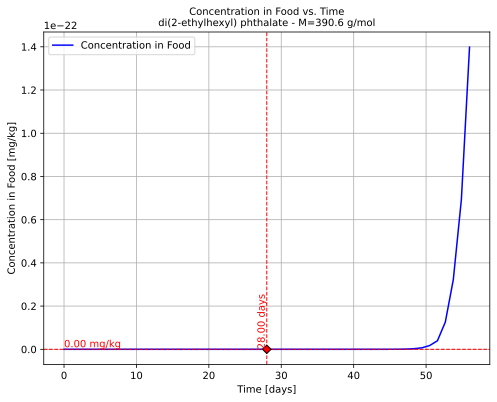

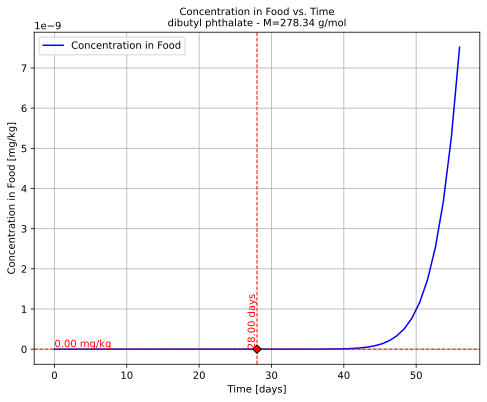

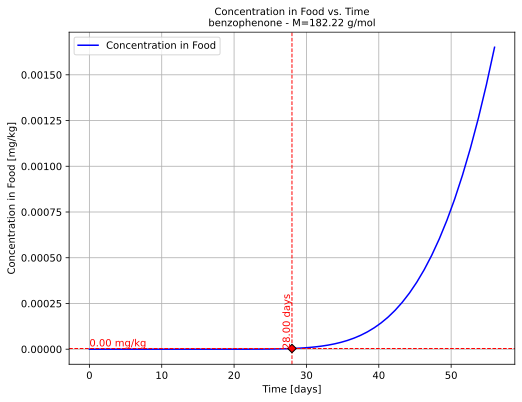

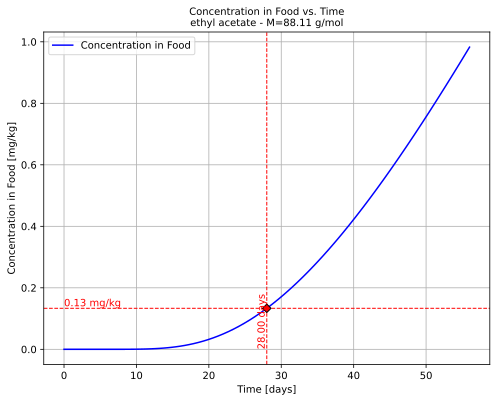

In [14]:
[(m % F << B >> P >> F).plotCF(plotSML=False,subtitle=f"{m.compound} - M={m.M} g/mol") for m in M]
display(separator)

🚩 **The strongly delayed kinetics observed with very low migration rates confirm that, while our initially naïve approach is not incorrect, it lacks robustness under more variable conditions.** The migration rate over time (e.g., at **28, 40, 50, and 60 days**) **does not evolve linearly**; instead, it exhibits a **tremendous acceleration** at later stages. This non-linearity suggests that **longer contact times could significantly alter our conclusions**.  

To improve the robustness of our scenario, we need to **move away from the assumption that all substances are initially concentrated in the sleeve at the moment food contact begins**. A more realistic approach should account for **gradual release profiles, pre-existing diffusion within the material, and potential equilibrium adjustments before migration into the food simulant begins**.

***

## 9 | **Adding a Storage Step Without Food for 3 Months at Room Temperature** 🗓️  

❗❗❗ **The previous analysis is too restrictive.** If the **bottle and sleeve are stored together** for **3 months at 25°C** before filling, the **initial concentration distribution may shift**, potentially **accelerating subsequent migration** when food contact begins.  

### 9.1 | **Evolution of concentration profiles during storage** 
> 📌 To better understand this effect, we first **plot the evolution of concentration profiles** during the **initial storage step**. We use for that the condition `nofood` that enables mass transfer only within the packaging.

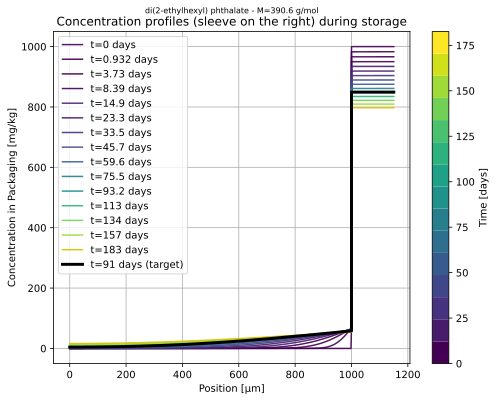

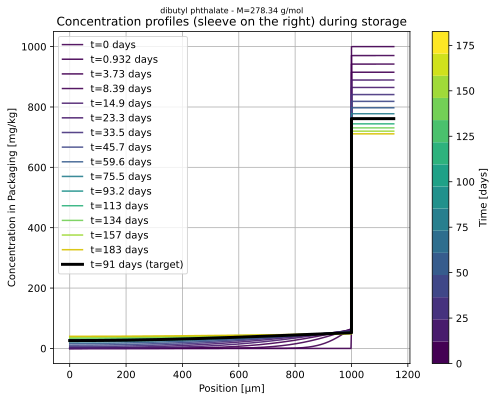

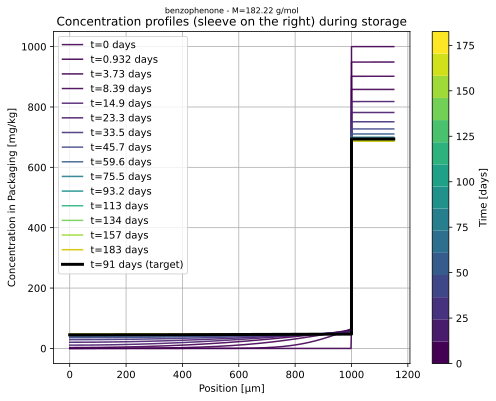

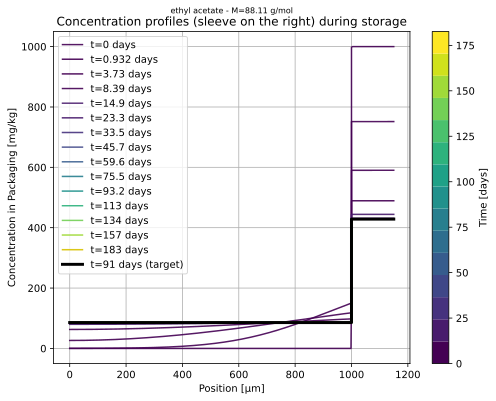

In [15]:
# we import the condition nofood
from patankar.food import nofood 
storage = nofood(contacttime=(3,"months"),contacttemperature=(25,"degC"))

# Illustration of the effects of the initial storage on the  distribution of each substance before filling the bottle
title = "Concentration profiles (sleeve on the right) during storage"
[(m % storage << B >> P >> storage).plotCx(title=title,subtitle=f"{m.compound} - M={m.M} g/mol") for m in M]
display(separator2)

🚩🚩🚩 **This additional storage step reveals that substances can diffuse toward the bottle interface before filling, significantly altering their initial distribution.** As a result, once food is introduced, **migration rates may increase dramatically** due to the **shortened diffusion path and enhanced local concentration gradients at the interface**.
***

### 9.2 | **Chaining Storage and Contact Steps**  

Simulations are **chained** using the `>>` operator in `SFPPy`, allowing a sequential representation of **storage and contact phases**.  

<details>  
<summary><b>ℹ️ Interpretation of the Full Chaining</b></summary>  
<br>  

The simulation sequence follows a **stepwise progression**:  

| <kbd>m</kbd>`%` | <kbd>storage</kbd> | `<<` <kbd>B</kbd> `>>` | <kbd>P</kbd> `>>` | <kbd>storage</kbd> `>>` | <kbd>F</kbd> `>>` | <kbd>S</kbd> `>>` |
|:--------------:|:-------------------:|:-----------------:|:------------------:|:-----------------:|:-----------------:|:-----------------:|
| ⌬             | 🔒🗓️☀️  | 🫙  | ♴♵  | 🔒🗓️☀️  | 🥃⏱️❄️  | 📈📊📉 |

#### **Symbolic Interpretation**  
- **🫙** → Empty packaging  
- **🔒🗓️☀️** → Storage without food (time and temperature effects)  
- **♴♵** → Interaction with polymer layers  
- **🥃⏱️❄️** → Filled packaging (contact phase begins)  
- **📈📊📉** → Migration analysis & result evaluation  

By chaining these steps, we **capture the full exposure history** of the packaging, accounting for both **pre-filling storage effects** and subsequent **food contact migration**.  

</details>  


> 📌 **We plot the migration kinetics starting from the moment the bottle is filled** (**$t = 0$ refers to the filling time**). This allows us to analyze how migration evolves over time, considering the prior storage effects on initial concentration distributions.

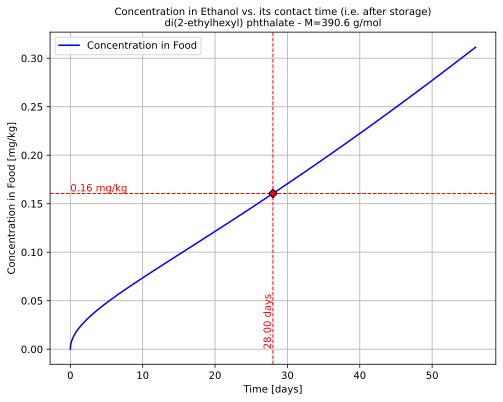

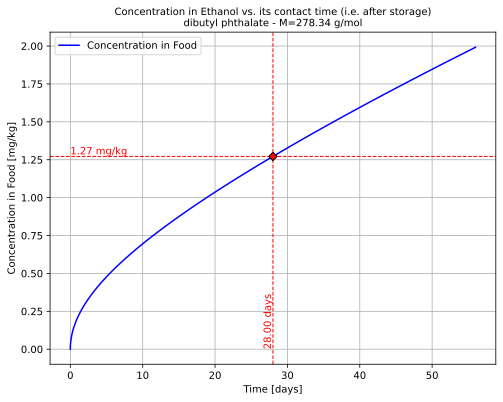

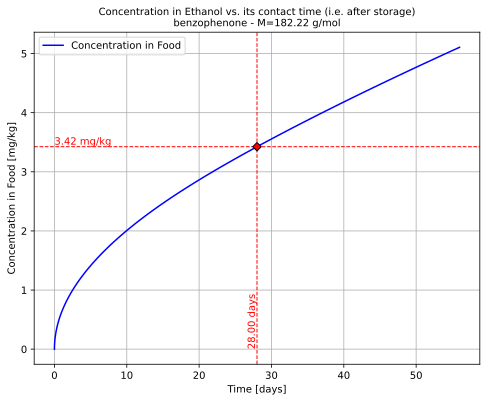

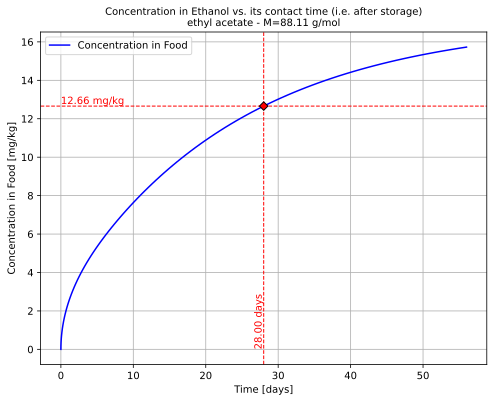

In [16]:
title = "Concentration in Ethanol vs. its contact time (i.e. after storage)"
[(m % storage << B >> P >> storage >> F).plotCF(plotSML=False, title = title,
                                                subtitle=f"{m.compound} - M={m.M} g/mol") for m in M]
display(separator2)

### 9.3 | **Revised Safety Evaluation**  

> 📌 **We accordingly revise** $C_F$ **and** $C_{P,0}^{max}$ **values** to reflect the updated migration dynamics, incorporating the effects of prior storage and sequential contact phases.

In [17]:
# Revise CF and CP0max
CFrev = [(m % storage << B >> P >> storage >> F).CFtarget.item() for m in M]
CP0max = calc_CP0max(CFrev)
day = 3600*24
tstorage = storage.contacttime / day
Tstorage = storage.contacttemperature
ttarget = F.contacttime / day
Ttarget = F.contacttemperature
print(f'CF after {ttarget} days @{Ttarget}°C (+{tstorage} days @{Tstorage}°C) =',CFrev)
print("CP0max revised =",CP0max, "mg/kg")
display(separator2)

CF after [28.] days @[7]°C (+[91.3125] days @[25]°C) = [0.1605605281248774, 1.2718288984784145, 3.424066878740386, 12.658795326967564]
CP0max revised = [373690.84855858504, 471.7615716373685, 175.23022220311373, 4739.787511389767] mg/kg


> 📌 **We update the fractional migration values** and **summarize the revised safety evaluation in a table** for clearer assessment.

In [18]:
fractionalMigration = 1 - CF*VF / masst0 # 1=total mass transfer, 0=no mass transfer
# We tabulate the values in a DataFrame
d_summary = pd.DataFrame({
    "Name": N,
    "CP0max with storage": CP0max,
    "Fractional migration": CFrev*VF / masst0,
        })

print("\nFractional migration: effects of simulants(Et=ethanol, Et50=ethanol 50) and temperature (7°C, 12°C).\n")
display(d_summary); display(separator)


Fractional migration: effects of simulants(Et=ethanol, Et50=ethanol 50) and temperature (7°C, 12°C).



,Name,CP0max with storage,Fractional migration
0,di(2-ethylhexyl) phthalate,373690.848559,0.009284
1,dibutyl phthalate,471.761572,0.073544
2,benzophenone,175.230222,0.197998
3,ethyl acetate,4739.787511,0.731999


📢❗🚨 **The revised** $C_{P,0}^{max}$ **values indicate that the situation might be critical for benzophenone, even for residual concentrations in the sleeve as low as 175 mg/kg.** Nearly **20% of its content is transferable** by the **sale-by-date**, highlighting a significant potential for migration.  

For **ethyl acetate**, a scenario assuming **total mass transfer** provides a more conservative and realistic approach.  

Regarding **plasticizers DEHP and DBP**, their migration behavior is less concerning. However, despite DBP exhibiting a **much higher migration rate** than DEHP (**7% vs. less than 1%**), its overall impact remains lower due to its lower initial concentration and regulatory limits.

***

## 10 | **Conclusions** 🎯  

This analysis demonstrates that **the primary source of uncertainty** in migration outcomes is the **contact history** between the **sleeve** and the **virgin bottle**.  

- **🧊 Plasticizers with relatively high molecular weight** pose **minimal risk** in **chilled products**, particularly when a **protective plastic layer** with **low chemical affinity** acts as a barrier.  
- **⚠️ Low molecular weight compounds**, such as **photoinitiators and solvents**, present a **greater concern**, especially when their **Specific Migration Limits (SMLs) are low**. These substances **diffuse more rapidly** across the bottle walls due to their **higher mobility**.  

Additionally, in the **current scenario**, the **bottle wall thickness** is **significantly lower than expected**, though still within **realistic manufacturing limits**. This factor further influences migration rates, **especially for highly mobile substances**.  

***

> 📌 **This notebook was prepared for educational purposes** 🏫 to assist in **drafting compliance certificates or regulatory dossiers** 📑. While it serves as a **template source for preparing official documents**, it requires **adaptation** to the **specifics of each case**.  
>  
> 🔍 For **monolayer materials**, a **single simulation step** may be sufficient. However, in **multilayer systems**, migration predictions must **incorporate prior storage and redistribution steps**, as substances may **accumulate at interfaces** before food contact begins.  
>  
> 🧪 **Sensitivity analysis is essential in all situations**. For example, special consideration should be given to **printing inks** 🎨 and constituents subjected to **phase change** 🌡️, as their **partitioning behavior (`k` values)** can vary **significantly with temperature** and should be **modeled accordingly**.  

***

> ✅ **All regulatory values, chemical properties, and physico-chemical parameters are extracted automatically** through the **`SFPPy` framework**, ensuring **accuracy and compliance**.  
> 🔧 **End-users can override existing values** by either **removing the "substance injection" step** (operator `%`) or by **defining custom `layerLink` values** to modify interlayer interactions.  
> 📖 For detailed guidance, refer to the **SFPPy Wiki pages**.  

In [19]:
display(footer, separator, disclaimer, logo); 